# Coursera Capstone Project : Data Science 

In [1]:
import pandas as pd
import numpy as np 

In [3]:
#Pulling 
df_Postal_TO = pd.read_html ('http://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M', header = 0)[0]
df_Postal_TO.head() 

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [4]:
df_Postal_TO = df_Postal_TO[df_Postal_TO.Borough != 'Not assigned']
df_Postal_TO = df_Postal_TO.groupby(['Postal Code','Borough'])['Neighborhood'].apply(lambda x : ', '.join(x)).reset_index()
for i in df_Postal_TO.index:
    if df_Postal_TO['Neighborhood'][i] == 'Not assigned':
        df_Postal_TO['Neighborhood'][i] = df_Postal_TO['Borough'][i]
df_Postal_TO.head() 

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [5]:
df_Postal_Geo = pd.read_csv ('http://cocl.us/Geospatial_data')
df_TO_Geo = pd.merge(df_Postal_TO, df_Postal_Geo, how = 'left', on = 'Postal Code')
df_TO_Geo.head() 

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [6]:
# Importing required libraries 
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

import json 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

In [7]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="TO_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [8]:
CLIENT_ID = '301YBMLKZR0URLRMNH3GDZK5HHW5Q4IYZUXJL43LZ1XKXUX2' 
CLIENT_SECRET = 'OPYYWUKJKH1FDNGKNTXU1KRO545DWK1B1M1IWRMFYU3IVMSG' 
VERSION = '20190510'
LIMIT = 50; 
RADIUS = 1000;

CAT_ID = '4d4b7105d754a06374d81259'

In [9]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT, 
            CAT_ID
            )
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [35]:
toronto_venues = getNearbyVenues(names = df_TO_Geo['Neighborhood'], latitudes=df_TO_Geo['Latitude'], longitudes=df_TO_Geo['Longitude'])

In [51]:
toronto_venues.head() 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Harvey's,43.800020,-79.198307,Restaurant
1,"Malvern, Rouge",43.806686,-79.194353,Wendy's,43.802008,-79.198080,Fast Food Restaurant
2,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
3,"Malvern, Rouge",43.806686,-79.194353,Caribbean Wave,43.798558,-79.195777,Caribbean Restaurant
4,"Malvern, Rouge",43.806686,-79.194353,Mr Jerk,43.801262,-79.199758,African Restaurant


In [60]:
toronto_venues[toronto_venues['Neighborhood'] == 'Agincourt'].sort_values('Venue Category')

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
149,Agincourt,43.7942,-79.262029,Joey Bravo's Italian Restaurant,43.788071,-79.265134,American Restaurant
166,Agincourt,43.7942,-79.262029,Boston Steak House 波士頓餐廳,43.787744,-79.267428,Asian Restaurant
159,Agincourt,43.7942,-79.262029,Better Kitchen,43.788090,-79.268049,Asian Restaurant
161,Agincourt,43.7942,-79.262029,Mike's BBQ 丰記燒臘,43.787910,-79.269405,BBQ Joint
142,Agincourt,43.7942,-79.262029,Aromaz Cake and Pastry 龍騰閣,43.797714,-79.270870,Bakery
133,Agincourt,43.7942,-79.262029,Francesca Bakery,43.787716,-79.256852,Bakery
126,Agincourt,43.7942,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
154,Agincourt,43.7942,-79.262029,BlackGold Cafe,43.788812,-79.268869,Café
129,Agincourt,43.7942,-79.262029,Yummy Cantonese Restaurant 老西関腸粉,43.787568,-79.269585,Cantonese Restaurant
125,Agincourt,43.7942,-79.262029,The Roti Hut,43.787277,-79.258724,Caribbean Restaurant


In [122]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])

toronto_onehot = toronto_onehot[fixed_columns]

toronto_grouped = toronto_onehot.groupby('Neighborhood').sum().reset_index()

toronto_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Agincourt,0,0,1,0,0,2,1,0,2,...,0,0,0,0,0,0,0,0,1,0
1,"Alderwood, Long Branch",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Bathurst Manor, Wilson Heights, Downsview North",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bayview Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Bedford Park, Lawrence Manor East",0,0,1,0,0,0,0,1,1,...,0,0,2,0,0,0,0,0,0,1
5,Berczy Park,0,0,1,0,0,0,1,1,3,...,0,0,1,0,0,0,0,1,0,0
6,"Birch Cliff, Cliffside West",0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,"Brockton, Parkdale Village, Exhibition Place",0,0,1,0,0,1,1,0,3,...,0,1,0,0,3,0,0,2,0,0
8,"Business reply mail Processing Centre, South C...",0,0,1,0,0,0,1,0,3,...,0,0,1,0,0,0,0,0,0,0
9,"CN Tower, King and Spadina, Railway Lands, Har...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Agincourt,Chinese Restaurant,Caribbean Restaurant,Pizza Place,Restaurant,Asian Restaurant
1,"Alderwood, Long Branch",Pizza Place,Sandwich Place,Donut Shop,Moroccan Restaurant,Cuban Restaurant
2,"Bathurst Manor, Wilson Heights, Downsview North",Pizza Place,Mediterranean Restaurant,Deli / Bodega,Diner,Chinese Restaurant
3,Bayview Village,Japanese Restaurant,Restaurant,Chinese Restaurant,Café,Wings Joint
4,"Bedford Park, Lawrence Manor East",Pizza Place,Italian Restaurant,Sushi Restaurant,Restaurant,Sandwich Place


Changing the one hot eoncoding to usable data

In [63]:
temp_dfX = toronto_onehot.drop(['Neighborhood'], axis = 1)
X = temp_dfX [temp_dfX.columns].values
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [64]:
df_temp = df_TO_Geo['Neighborhood'].unique()
temp_list= df_temp.tolist()

ref_list = {k : v for v , k in enumerate(temp_list)}

In [65]:
temp_dfY = toronto_onehot['Neighborhood'].map(ref_list)
Y = temp_dfY.to_numpy()

Train set: (2077, 110) (2077,)
Test set: (520, 110) (520,)


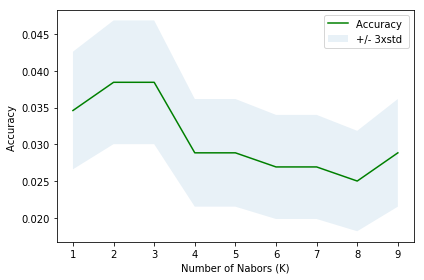

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=21)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.ticker as ticker
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter


Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [121]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.038461538461538464 with k= 2


In [124]:
from sklearn.cluster import KMeans

kclusters = 2

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5] 

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_TO_Geo

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.dropna(subset = ['Cluster Labels'], inplace = True)
toronto_merged

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,1.0,Fast Food Restaurant,Restaurant,Greek Restaurant,Sandwich Place,Caribbean Restaurant
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,1.0,Breakfast Spot,Burger Joint,Italian Restaurant,Wings Joint,Diner
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,1.0,Pizza Place,Restaurant,Greek Restaurant,Breakfast Spot,Chinese Restaurant
3,M1G,Scarborough,Woburn,43.770992,-79.216917,1.0,Pizza Place,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Fish & Chips Shop
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,1.0,Bakery,Chinese Restaurant,Indian Restaurant,Wings Joint,German Restaurant
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,1.0,Pizza Place,Restaurant,Sandwich Place,Japanese Restaurant,Wings Joint
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029,1.0,Chinese Restaurant,Pizza Place,Burger Joint,Asian Restaurant,Sandwich Place
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577,1.0,Diner,Bakery,Restaurant,Sandwich Place,Mexican Restaurant
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476,1.0,Pizza Place,Burger Joint,Wings Joint,Cuban Restaurant,Dim Sum Restaurant
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,1.0,Diner,Restaurant,Thai Restaurant,Café,Wings Joint


In [49]:
!conda install -c conda-forge folium=0.11.0 --yes 
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.11.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.11.0              |             py_0          61 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          87 KB

The following NEW packages will be INSTALLED:

    branca: 0.4.1-py_0  conda-forge
    folium: 0.11.0-py_0 conda-forge


folium-0.11.0        | 61 KB     | ##################################### | 100% 
branca-0.4.1         | 26 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [125]:
# Generating map for data. 

import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    
    
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [126]:
testing = toronto_merged.loc[:,'Neighborhood':'5th Most Common Venue'].sort_values('1st Most Common Venue', ascending =True)
testing

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
102,"Northwest, West Humber - Clairville",43.706748,-79.594054,1.0,Afghan Restaurant,Food,Dim Sum Restaurant,Diner,Doner Restaurant
100,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724,1.0,American Restaurant,Chinese Restaurant,Sandwich Place,Pizza Place,Wings Joint
97,"Humberlea, Emery",43.724766,-79.532242,1.0,Bakery,Donut Shop,Italian Restaurant,Wings Joint,Food
4,Cedarbrae,43.773136,-79.239476,1.0,Bakery,Chinese Restaurant,Indian Restaurant,Wings Joint,German Restaurant
18,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,1.0,Bakery,Japanese Restaurant,Restaurant,Sandwich Place,Fast Food Restaurant
1,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,1.0,Breakfast Spot,Burger Joint,Italian Restaurant,Wings Joint,Diner
68,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420,1.0,Café,Japanese Restaurant,Sushi Restaurant,Wings Joint,Fish & Chips Shop
67,"Kensington Market, Chinatown, Grange Park",43.653206,-79.400049,0.0,Café,Mexican Restaurant,Vegetarian / Vegan Restaurant,Caribbean Restaurant,Bakery
66,"University of Toronto, Harbord",43.662696,-79.400049,0.0,Café,Bakery,Vegetarian / Vegan Restaurant,Restaurant,Mexican Restaurant
65,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,0.0,Café,Vegetarian / Vegan Restaurant,Restaurant,Italian Restaurant,Mexican Restaurant


In [131]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]].sort_values('1st Most Common Venue', ascending =True)

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
56,Downtown Toronto,0.0,Café,Restaurant,Japanese Restaurant,Italian Restaurant,Bakery
65,Central Toronto,0.0,Café,Vegetarian / Vegan Restaurant,Restaurant,Italian Restaurant,Mexican Restaurant
61,Downtown Toronto,0.0,Café,Restaurant,Japanese Restaurant,Seafood Restaurant,American Restaurant
60,Downtown Toronto,0.0,Café,Restaurant,Japanese Restaurant,Seafood Restaurant,American Restaurant
59,Downtown Toronto,0.0,Café,Restaurant,Japanese Restaurant,Italian Restaurant,Deli / Bodega
58,Downtown Toronto,0.0,Café,Sushi Restaurant,American Restaurant,Japanese Restaurant,Steakhouse
84,West Toronto,0.0,Café,Pizza Place,Bakery,Sushi Restaurant,Restaurant
69,Downtown Toronto,0.0,Café,Restaurant,Japanese Restaurant,Italian Restaurant,Bakery
54,Downtown Toronto,0.0,Café,Restaurant,Japanese Restaurant,Gastropub,Middle Eastern Restaurant
53,Downtown Toronto,0.0,Café,Diner,Sushi Restaurant,Restaurant,Italian Restaurant


In [132]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]].sort_values('1st Most Common Venue', ascending =True)

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
102,Etobicoke,1.0,Afghan Restaurant,Food,Dim Sum Restaurant,Diner,Doner Restaurant
100,Etobicoke,1.0,American Restaurant,Chinese Restaurant,Sandwich Place,Pizza Place,Wings Joint
97,North York,1.0,Bakery,Donut Shop,Italian Restaurant,Wings Joint,Food
4,Scarborough,1.0,Bakery,Chinese Restaurant,Indian Restaurant,Wings Joint,German Restaurant
18,North York,1.0,Bakery,Japanese Restaurant,Restaurant,Sandwich Place,Fast Food Restaurant
1,Scarborough,1.0,Breakfast Spot,Burger Joint,Italian Restaurant,Wings Joint,Diner
88,Etobicoke,1.0,Café,Bakery,Falafel Restaurant,Mexican Restaurant,Restaurant
44,Central Toronto,1.0,Café,Fast Food Restaurant,Restaurant,Sushi Restaurant,Pizza Place
68,Downtown Toronto,1.0,Café,Japanese Restaurant,Sushi Restaurant,Wings Joint,Fish & Chips Shop
6,Scarborough,1.0,Chinese Restaurant,Pizza Place,Burger Joint,Asian Restaurant,Sandwich Place
